# Proposal for the "Jupyter Notebook : Your turn" of page 26 of "Support IT course.pdf" document

## First step adapt the google colab code to make it works with Jupyter Notebook
* rename the notebook name to "Jupyter_notebook_your_turn" and clean code related to "Google"
* Download the moodle "survey 1" file into your local PC under a new folder called "supportIT" created where you launch Jupyter Notebook from
* install pandas library in your virtual environment
* Doing this you can check that the pie chart done on GoogleColab works the same way on Jupyter Notebook

In [1]:
# no more used
#from google.colab import drive
#drive.mount('/content/drive')

**Import needed libraries**

In [2]:
import pandas as pd
import os

**Define constants**

In [3]:
SURVEY_FOLDER = 'SupportIT'
SURVEY_FILENAME = 'survey_1.csv'

**Prepare the filepath to load the survey file**

In [4]:
current_path = os.path.abspath(os.getcwd())
survey_path = os.path.join(current_path,SURVEY_FOLDER)
survey_filepath = os.path.join(survey_path,SURVEY_FILENAME)

**Read the file and put it in a Panda structure**

By default Pandas try to find a header row and use this header row to name the column in the Pandas structure

In [5]:
df = pd.read_csv(survey_filepath, encoding='utf-8', sep=';')
df.head()

,Student,OS ?,Comment - Which Operating System are you using ?,Python ?,Version ?,Virtual ?,IDE ?,R ?,Version ?.1,second
0,student1,Mac,NaN,Yes,3.9,conda,idle,yes,4,NaN
1,student2,Windows 10,NaN,Yes,3.8,conda,notebook/spyder,yes,4,NaN
2,student3,Windows 10,NaN,Yes,3.9,conda,pycharm/sublime,yes,4,NaN
3,student4,Windows 10,NaN,Yes,3.9,conda,pycharm,yes,4,NaN
4,student5,Windows 10,NaN,Yes,3.7,conda,atom,no,NaN,NaN


**Prepare data for drawing**

Count the number of value for each OS

In [6]:
df_os = df['OS ?'].value_counts()
df_os

Windows 10    19
Mac            3
Linux          2
Name: OS ?, dtype: int64

**Plot the Pie Chart**

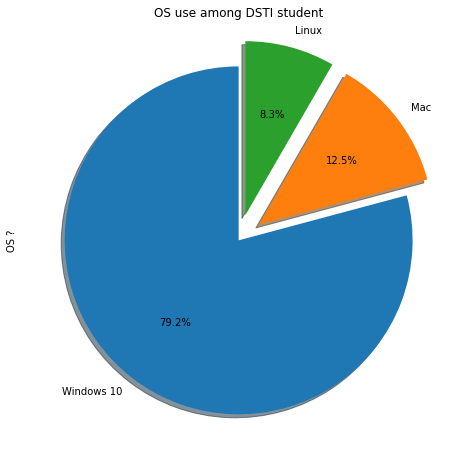

In [7]:
plot = df_os.plot.pie(figsize=(8,8),title="OS use among DSTI student", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.15, 0.15), \
                   shadow=True, startangle=90)

## Now, keep on working with Jupyter Notebook for the others columns
### Choose the interesting columns and rename the columns

In [8]:
# Rename column
df_sel = df[['OS ?','Version ?','Virtual ?','IDE ?']]
df_sel.columns = ['Installed_OS','Python_Version','Used_Virtual_Env','Used_IDE']
df_sel.head()

,Installed_OS,Python_Version,Used_Virtual_Env,Used_IDE
0,Mac,3.9,conda,idle
1,Windows 10,3.8,conda,notebook/spyder
2,Windows 10,3.9,conda,pycharm/sublime
3,Windows 10,3.9,conda,pycharm
4,Windows 10,3.7,conda,atom


### Bar Plot for the Python_Version Column

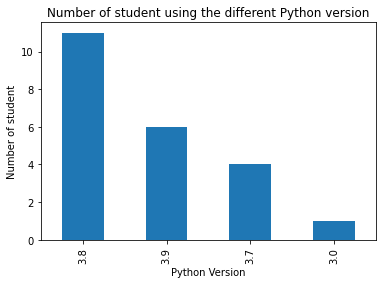

In [9]:
import matplotlib.pyplot as plt

df_python_version = df_sel['Python_Version'].value_counts()
fig, ax = plt.subplots()
df_python_version.plot(ax = ax, kind = 'bar')
plt.title('Number of student using the different Python version')
plt.xlabel('Python Version')
plt.ylabel('Number of student')
plt.show()

### Bar Plot for the Used_Virtual_Env Column

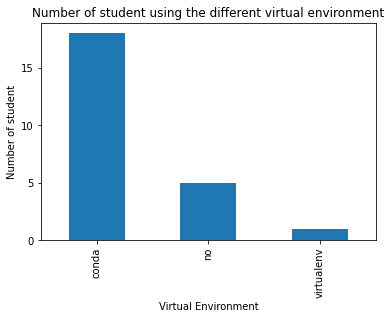

In [10]:
df_virtual_env = df_sel['Used_Virtual_Env'].value_counts()
fig, ax = plt.subplots()
df_virtual_env.plot(ax = ax, kind = 'bar')
plt.title('Number of student using the different virtual environment')
plt.xlabel('Virtual Environment')
plt.ylabel('Number of student')
ax.set_yticks(range(0,max(df_virtual_env),5))
plt.show()

### Pie Chart for the Used_IDE column and get all four graphs on a common graph

**When there are several answers then keep only the first one (my choice)**

In [11]:
df_sel['Used_IDE'] = df_sel['Used_IDE'].apply(lambda x : x.split('/')[0])

<ipython-input-11-71a6b27a30d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Used_IDE'] = df_sel['Used_IDE'].apply(lambda x : x.split('/')[0])


In [12]:
df_used_ide = df_sel['Used_IDE'].value_counts()

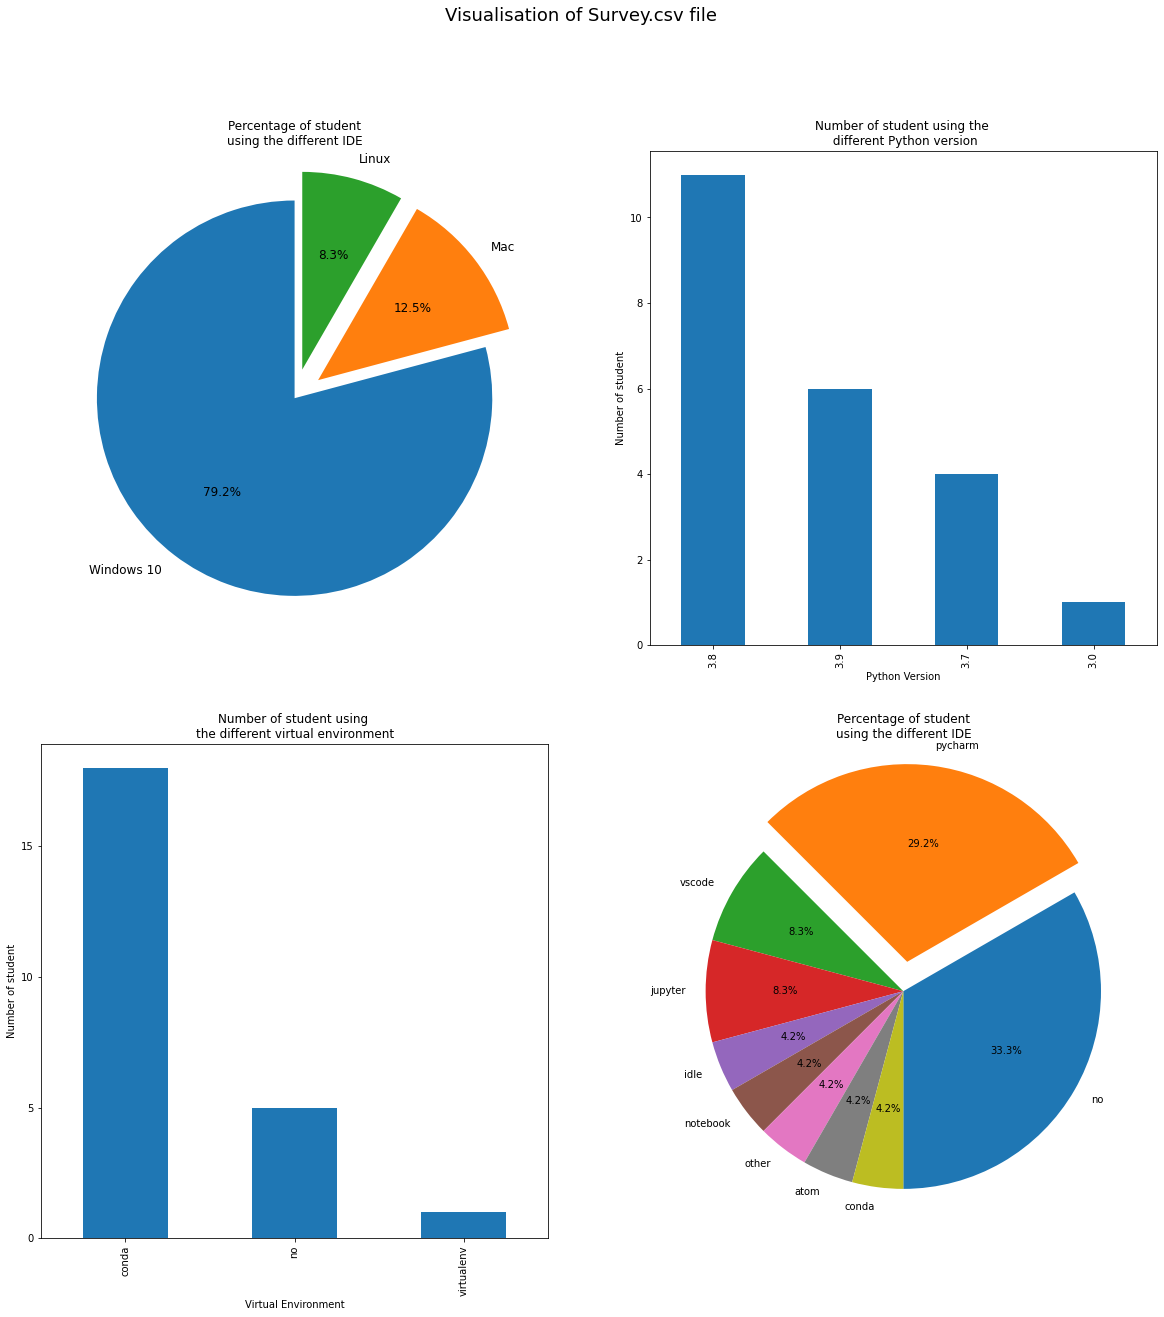

In [13]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Visualisation of Survey.csv file", fontsize=18)

ax = fig.add_subplot(221)
df_os.plot.pie(ax = ax,autopct='%1.1f%%', startangle=90,explode = (0,0.15,0.15),fontsize=12)
plt.title('Percentage of student\nusing the different IDE')
plt.xlabel('')
plt.ylabel('')

a0 = fig.add_subplot(222)
df_python_version.plot(ax = a0, kind = 'bar')
plt.title('Number of student using the \n different Python version')
plt.xlabel('Python Version')
plt.ylabel('Number of student')

a1 = fig.add_subplot(223)
df_virtual_env.plot(ax = a1, kind = 'bar')
plt.title('Number of student using \nthe different virtual environment')
plt.xlabel('Virtual Environment')
plt.ylabel('Number of student')
a1.set_yticks(range(0,max(df_virtual_env),5))

a2 = fig.add_subplot(224)
df_used_ide.plot(ax = a2, kind = 'pie',autopct='%1.1f%%', startangle=270,explode = (0,0.15,0,0,0,0,0,0,0),fontsize=10)
plt.title('Percentage of student\nusing the different IDE')
plt.xlabel('')
plt.ylabel('')

plt.show()